<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>


<h1>Lab - Detecting text in images with OpenCV and Tesseract OCR</h1>

<h3>Objective for this excecise<h3>
    
In this lab you will learn about about Automatic number-plate recognition. We will use the Tesseract OCR An Optical Character Recognition Engine (OCR Engine) to automatically recognize text in vehicle registration plates. Pretty cool, right?
    
After completing this lab you will:    
<h5> 1. Learn to download, read and display images using Python, OpenCV and Matplotlib </h5>
<h5> 2. Learn to use Tesseract OCR for detetcing text in images</h5>
<h5> 3. Learn about image processing techniques </h5>
<h5> 4. Compress images using a technique called K Means Clustering</h5>
<h5> 5. Compress images by up to 90% ! </h5>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <br>
    <br>
    <h2>Table of Contents</h2>
    <ul>
        <li><a href="#ref0">Tesseract</a></li>
        <li><a href="#ref1">Perform OCR using the Tesseract Engine on license plates</a></li>
        <li><a href="#ref2">Image Processing Techniques</a></li>
        <li><a href="#ref4">Exercises</a></li>
    </ul>
    <br>
    <p>Estimated Time Needed: <strong>1 hr</strong></p>
    </div>
<hr>


<a id="ref0"></a>

<h2 align="center">Tesseract<a href="http://opensource.google.com/projects/tesseract"> Homepage</a></h2>


-   Tesseract is an Optical Character Recognition (OCR) Engine open-sourced and supported by Google
-   Has ability to recognize more than 100 languages out of the box


##### We will use Tesseract for recognizing images of License Plates. These images were clicked under different lighting conditions and have a variety of variations in them. Pretty cool, right?


To view the license plates, you could click on the `license_plates` folder which is listed in the files directory in the left-sidebar of the JupyterLab environment. If this side menu is hidden, you can go to `View`>`View Left-Sidebar`. Once you click on the folder, you could click on each file name to view the image of the license plate


#### Install the Pytesseract package for using the Tesseract Engine with Python


In [1]:
!pip install --upgrade pytesseract wget

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built pytesseract wget


In [2]:
# Loading the required python modules
import pytesseract
import matplotlib.pyplot as plt
import cv2
import glob
import os

<a id="ref1"></a>

<h2 align="center">Perform OCR using the Tesseract Engine on license plates</h2>


In [3]:
import wget, zipfile, os

filename='license-plates'

if not os.path.isfile(filename):
    filename = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/license-plates.zip')
    with zipfile.ZipFile("license-plates.zip","r") as zip_ref:
        zip_ref.extractall()

In [4]:
path_for_license_plates = os.getcwd() + "/license-plates/**/*.jpg"
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive=True):
    
    license_plate_file = path_to_license_plate.split("/")[-1]
    license_plate, _ = os.path.splitext(license_plate_file)
    '''
    Here we append the actual license plate to a list
    '''
    list_license_plates.append(license_plate)
    
    '''
    Read each license plate image file using openCV
    '''
    img = cv2.imread(path_to_license_plate)
    
    '''
    We then pass each license plate image file to the Tesseract OCR engine using 
    the Python library wrapper for it. We get back a predicted_result for the license plate.
    We append the predicted_result in a list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img, lang='eng',
    config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
    predicted_license_plates.append(filter_predicted_result)

In [5]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
    for actual_plate, predict_plate in zip(actual_list, predicted_list):
        accuracy = "0%"
        num_matches = 0
        if actual_plate == predict_plate:
            accuracy = "100%"
        else:
            if len(actual_plate) == len(predict_plate):
                for a, p in zip(actual_plate, predict_plate):
                    if a == p:
                        num_matches += 1
                accuracy = str(round((num_matches/len(actual_plate)), 2) * 100)
                accuracy += "%"
        print("     ", actual_plate, "\t\t\t", predict_plate, "\t\t  ", accuracy)

        
calculate_predicted_accuracy(list_license_plates, predicted_license_plates)

Actual License Plate 	 Predicted License Plate 	 Accuracy
-------------------- 	 ----------------------- 	 --------
      PJD2685 			 PJD2685 		   100%
      NZW2197 			 NZW2197 		   100%
      PJB7392 			 PJB7392 		   100%
      NYY1710 			 NYY1710 		   100%
      OCX4764 			 OCX4764 		   100%
      OYJ9557 			 OYJ9557 		   100%
      OLC4728 			 OLC4728 		   100%
      PJG0783 			 PJG0783 		   100%
      OKV8004 			 QKV8004 		   86.0%
      ODJ1599 			 ODJ1599 		   100%
      PJB2414 			 PJB2414 		   100%
      OUP9563 			 OUP9563 		   100%
      AYO9034 			 AYO9034 		   100%
      GWT2180 			 GWT2120 		   86.0%
      JSQ1413 			 JSQ|413 		   86.0%
      OKS0078 			 OKS0078 		   100%
      OLA1208 			 OLA1208 		   100%
      NTK5785 			 NTK5785 		   100%


<h3>Woah! We see that the Tesseract OCR engine mostly predicts all of the license plates correctly with 100% accuracy! </h3>

<h3>For the license plates the Tesseract OCR Engine predicted incorrectly (i.e. GWT2180, OKV8004, JSQ1413), we will apply image processing techniques on those license plate files and pass them to the Tesseract OCR again. Applying the image processing techniques would increase the accuracy of the Tesseract Engine for the license plates of GWT2180, OKV8004, JSQ1413</h3>


<a id="ref2"></a>

<h2 align="center"> Image Processing Techniques </h2>


Image resizing is a technique in which we scale the image either horizontally, or vertically or both.  
Further documentation on image resizing: [here](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

For our use case, we will read the license plate file of `GWT2180` using `cv2.imread` and then resize the image file by a factor of 2x in both the horizontal and vertical directions using `cv2.resize`


Text(0.5, 1.0, 'GWT2180 license plate')

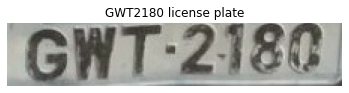

In [6]:
# Read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd() + "/license-plates/GWT2180.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('GWT2180 license plate')

#### 1. Image resizing


In [7]:
resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

#### 2. Converting to Grayscale


Next, we convert our resized image file to gray scale. We learnt about this technique in the image processing lab


In [8]:
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)

#### 3. Denoising the Image


Gaussian Blur is a technique for denoising images. Full OpenCV documentation on Gaussian Blur: [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#gaussian-filtering?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork-19816089&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

We apply a gaussian blur to the greyscale image


In [10]:
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0)

#### Pass the transformed license plate file to the Tesseract OCR engine and see the predicted result


In [11]:
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)

GWT2180


#### Voila We see that the Tesseract OCR correctly recognises all characters in the GWT2180 license plate after we passed in the transformed license plate


<a id="ref4"></a>

<h2 align="center"> Exercises </h2>


## Exercise 1:


Text(0.5, 1.0, 'JSQ1413 license plate')

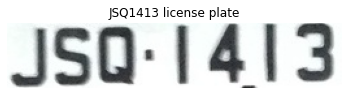

In [12]:
# 1.1 Read in the license plate file of JSQ1413
# Write your code below:
test_license_plate2 = cv2.imread(os.getcwd() + "/license-plates/JSQ1413.jpg")
plt.imshow(test_license_plate2)
plt.axis('off')
plt.title('JSQ1413 license plate')

In [13]:
# 1.2 Apply the image processing techniques to the license plate of JSQ1413 described above 
# Write your code below:
resize_test_license_plate2 = cv2.resize(test_license_plate2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
grayscale_resize_test_license_plate2 = cv2.cvtColor(resize_test_license_plate2, cv2.COLOR_BGR2GRAY)
gaussian_blur_license_plate2 = cv2.GaussianBlur(grayscale_resize_test_license_plate2, (5, 5), 0)

In [14]:
# 1.3 Pass the modified license plate file to the Tesseract Engine. Report your findings 
# Write your code below:
new_predicted_result_JSQ1413 = pytesseract.image_to_string(gaussian_blur_license_plate2, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_JSQ1413 = "".join(new_predicted_result_JSQ1413.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_JSQ1413)

JSQ1413


Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!---

# 1.1 Read the license plate file and display it

test_license_plate_JSQ1413 = cv2.imread(os.getcwd() + "/license-plates/JSQ1413.jpg")
plt.imshow(test_license_plate_OKV8004)
plt.axis('off')
plt.title('OKV8004 license plate')

# 1.2 Apply the image processing techniques to the license plate of JSQ1413 described above

resize_test_license_plate_JSQ1413 = cv2.resize(test_license_plate_JSQ1413, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
grayscale_resize_test_license_plate_JSQ1413 = cv2.cvtColor(resize_test_license_plate_JSQ1413, cv2.COLOR_BGR2GRAY)
gaussian_blur_license_plate_JSQ1413 = cv2.GaussianBlur(grayscale_resize_test_license_plate_JSQ1413, (5, 5), 0)

# 1.3 Pass the modified license plate file to the Tesseract Engine. Report your findings

new_predicted_result_JSQ1413 = pytesseract.image_to_string(gaussian_blur_license_plate_JSQ1413, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_JSQ1413 = "".join(new_predicted_result_JSQ1413.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_JSQ1413)
--->


<h1>Thank you for completing this lab!</h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cloud.ibm.com/catalog/services/watson-studio"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>


## Authors

<a href="https://www.linkedin.com/in/sacchitchadha/" target="_blank" >Sacchit Chadha</a>

## Other Contributors

Nayef Abou Tayoun


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Shubham    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
